# Exercise 2: Human Development Index Analysis

**Author:** Amogh Guthur

This notebook reads HDI Table 1 data from GitHub, cleans the dataset to keep only countries without missing values, computes summary statistics, and creates visualizations.

## Setup: Install and Load Packages

In [1]:
# Install required packages for data manipulation and reading Excel files
install.packages(c("tidyverse", "readxl", "httr"), quiet = TRUE)

In [2]:
# Load tidyverse for data manipulation and visualization
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.6
✔ forcats   1.0.1     ✔ stringr   1.6.0
✔ ggplot2   4.0.1     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.2.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [3]:
# Load readxl for reading Excel files
library(readxl)

In [4]:
# Load httr for downloading files from URLs
library(httr)

## Step 1: Download HDI Data from GitHub

In [5]:
# Define GitHub URL for HDI Excel file
url <- "https://github.com/FundamentalsAmogh/week5_hw2/raw/main/HDR25_Statistical_Annex_HDI_Table.xlsx"

# Download file to temporary location
temp <- tempfile(fileext = ".xlsx")
GET(url, write_disk(temp, overwrite = TRUE))

Response [https://raw.githubusercontent.com/FundamentalsAmogh/week5_hw2/main/HDR25_Statistical_Annex_HDI_Table.xlsx]
  Date: 2026-01-20 08:58
  Status: 200
  Content-Type: application/octet-stream
  Size: 44.1 kB
<ON DISK>  /tmp/RtmpD9Faad/filee1c1ef8e45f.xlsxNULL

## Step 2: Read and Inspect the Excel File

In [6]:
# View sheet names in the Excel file
excel_sheets(temp)

[1] "Table 1. HDI"

In [7]:
# Read the raw data to inspect structure (no skipping)
hdi_peek <- read_excel(temp, sheet = 1, n_max = 15)
hdi_peek

New names:
• `` -> `...1`
• `` -> `...3`
• `` -> `...4`
• `` -> `...5`
• `` -> `...6`
• `` -> `...7`
• `` -> `...8`
• `` -> `...9`
• `` -> `...10`
• `` -> `...11`
• `` -> `...12`
• `` -> `...13`
• `` -> `...14`
• `` -> `...15`


...1,Table 1. Human Development Index and its components,...3,...4,...5,...6,...7,...8,...9,...10,...11,...12,...13,...14,...15
<chr>,<chr>,<chr>,<lgl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA,NA,NA,NA,SDG3,NA,SDG4.3,NA,SDG4.4,NA,SDG8.5,NA,NA,NA,NA
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA,NA,Human Development Index (HDI),NA,Life expectancy at birth,NA,Expected years of schooling,NA,Mean years of schooling,NA,Gross national income (GNI) per capita,NA,GNI per capita rank minus HDI rank,NA,HDI rank
HDI rank,Country,Value,NA,(years),NA,(years),NA,(years),NA,(2021 PPP $),NA,NA,NA,NA
NA,NA,2023,NA,2023,NA,2023,a,2023,a,2023,NA,2023,b,2022
NA,Very high human development,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1,Iceland,0.97199999999999998,NA,82.691000000000003,NA,18.850589750000001,c,13.908926279999999,d,69116.937359999996,NA,12,NA,3
2,Norway,0.97,NA,83.308000000000007,NA,18.792850489999999,c,13.117962179999999,e,112710.0211,f,0,NA,1


In [8]:
# Read the data skipping appropriate header rows
hdi_raw <- read_excel(temp, sheet = 1)

New names:
• `` -> `...1`
• `` -> `...3`
• `` -> `...4`
• `` -> `...5`
• `` -> `...6`
• `` -> `...7`
• `` -> `...8`
• `` -> `...9`
• `` -> `...10`
• `` -> `...11`
• `` -> `...12`
• `` -> `...13`
• `` -> `...14`
• `` -> `...15`


In [9]:
# View column names
names(hdi_raw)

[1] "...1"                                               
 [2] "Table 1. Human Development Index and its components"
 [3] "...3"                                               
 [4] "...4"                                               
 [5] "...5"                                               
 [6] "...6"                                               
 [7] "...7"                                               
 [8] "...8"                                               
 [9] "...9"                                               
[10] "...10"                                              
[11] "...11"                                              
[12] "...12"                                              
[13] "...13"                                              
[14] "...14"                                              
[15] "...15"

In [10]:
# View first 20 rows
head(hdi_raw, 20)

...1,Table 1. Human Development Index and its components,...3,...4,...5,...6,...7,...8,...9,...10,...11,...12,...13,...14,...15
<chr>,<chr>,<chr>,<lgl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA,NA,NA,NA,SDG3,NA,SDG4.3,NA,SDG4.4,NA,SDG8.5,NA,NA,NA,NA
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA,NA,Human Development Index (HDI),NA,Life expectancy at birth,NA,Expected years of schooling,NA,Mean years of schooling,NA,Gross national income (GNI) per capita,NA,GNI per capita rank minus HDI rank,NA,HDI rank
HDI rank,Country,Value,NA,(years),NA,(years),NA,(years),NA,(2021 PPP $),NA,NA,NA,NA
NA,NA,2023,NA,2023,NA,2023,a,2023,a,2023,NA,2023,b,2022
NA,Very high human development,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1,Iceland,0.97199999999999998,NA,82.691000000000003,NA,18.850589750000001,c,13.908926279999999,d,69116.937359999996,NA,12,NA,3
2,Norway,0.97,NA,83.308000000000007,NA,18.792850489999999,c,13.117962179999999,e,112710.0211,f,0,NA,1


## Step 3: Select and Rename Columns


**IMPORTANT FIX:** The Excel file has alternating data columns and empty columns. Looking at the structure:
- Column 1: HDI Rank
- Column 2: Country  
- Column 3: HDI Value
- Column 4: **Empty (NA)**
- Column 5: Life Expectancy
- Column 6: **Empty (NA)**
- Column 7: Expected Years of Schooling
- Column 8: **Empty (NA)**
- Column 9: Mean Years of Schooling
- Column 10: **Empty (NA)**
- Column 11: GNI per Capita

We need to select columns **1, 2, 3, 5, 7, 9, 11** (skipping the empty ones).

In [11]:
# Select the CORRECT columns (skipping the empty NA columns)
# Columns: 1=Rank, 2=Country, 3=HDI, 5=Life Exp, 7=Expected School, 9=Mean School, 11=GNI
hdi_select <- hdi_raw[, c(1, 2, 3, 5, 7, 9, 11)]

In [12]:
# Rename columns to clean names
names(hdi_select) <- c("HDI_Rank", "Country", "HDI_Value", "Life_Expectancy",
                        "Expected_Years_Schooling", "Mean_Years_Schooling", "GNI_Per_Capita")

In [13]:
# View renamed data
head(hdi_select, 20)

HDI_Rank,Country,HDI_Value,Life_Expectancy,Expected_Years_Schooling,Mean_Years_Schooling,GNI_Per_Capita
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
NA,NA,NA,NA,NA,NA,NA
NA,NA,NA,SDG3,SDG4.3,SDG4.4,SDG8.5
NA,NA,NA,NA,NA,NA,NA
NA,NA,Human Development Index (HDI),Life expectancy at birth,Expected years of schooling,Mean years of schooling,Gross national income (GNI) per capita
HDI rank,Country,Value,(years),(years),(years),(2021 PPP $)
NA,NA,2023,2023,2023,2023,2023
NA,Very high human development,NA,NA,NA,NA,NA
1,Iceland,0.97199999999999998,82.691000000000003,18.850589750000001,13.908926279999999,69116.937359999996
2,Norway,0.97,83.308000000000007,18.792850489999999,13.117962179999999,112710.0211


## Step 4: Clean the Data - Keep Only Countries

In [14]:
# Remove rows where HDI_Rank is not a valid number (these are headers/notes)
hdi_clean <- hdi_select %>%
  filter(!is.na(suppressWarnings(as.numeric(HDI_Rank))))

In [15]:
# Convert columns to proper numeric types
hdi_clean <- hdi_clean %>% mutate(
  HDI_Rank = as.numeric(HDI_Rank),
  HDI_Value = as.numeric(HDI_Value),
  Life_Expectancy = as.numeric(Life_Expectancy),
  Expected_Years_Schooling = as.numeric(Expected_Years_Schooling),
  Mean_Years_Schooling = as.numeric(Mean_Years_Schooling),
  GNI_Per_Capita = as.numeric(GNI_Per_Capita)
)

In [16]:
# Check how many rows we have now
cat("Rows after filtering by valid HDI_Rank:", nrow(hdi_clean))

Rows after filtering by valid HDI_Rank: 193

## Step 5: Remove Countries with Missing Values

In [17]:
# Count missing values in each column
colSums(is.na(hdi_clean))

HDI_Rank                  Country                HDI_Value 
                       0                        0                        0 
         Life_Expectancy Expected_Years_Schooling     Mean_Years_Schooling 
                       0                        0                        0 
          GNI_Per_Capita 
                       0

In [18]:
# Remove rows with any missing values
hdi_final <- na.omit(hdi_clean)

In [19]:
# Check final row count
cat("Final number of countries:", nrow(hdi_final))

Final number of countries: 193

## Step 6: Verify Cleaned Data

In [20]:
# Check structure of final data
str(hdi_final)

tibble [193 × 7] (S3: tbl_df/tbl/data.frame)
 $ HDI_Rank                : num [1:193] 1 2 2 4 5 5 7 8 8 10 ...
 $ Country                 : chr [1:193] "Iceland" "Norway" "Switzerland" "Denmark" ...
 $ HDI_Value               : num [1:193] 0.972 0.97 0.97 0.962 0.959 0.959 0.958 0.955 0.955 0.951 ...
 $ Life_Expectancy         : num [1:193] 82.7 83.3 84 81.9 81.4 ...
 $ Expected_Years_Schooling: num [1:193] 18.9 18.8 16.7 18.7 17.3 ...
 $ Mean_Years_Schooling    : num [1:193] 13.9 13.1 13.9 13 14.3 ...
 $ GNI_Per_Capita          : num [1:193] 69117 112710 81949 76008 64053 ...


In [21]:
# View first 15 rows
head(hdi_final, 15)

HDI_Rank,Country,HDI_Value,Life_Expectancy,Expected_Years_Schooling,Mean_Years_Schooling,GNI_Per_Capita
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Iceland,0.972,82.691,18.85059,13.90893,69116.94
2,Norway,0.970,83.308,18.79285,13.11796,112710.02
2,Switzerland,0.970,83.954,16.66753,13.94912,81948.90
4,Denmark,0.962,81.933,18.70401,13.02732,76007.86
5,Germany,0.959,81.378,17.30922,14.29637,64053.22
5,Sweden,0.959,83.262,18.99147,12.74033,66102.09
7,Australia,0.958,83.923,20.65478,12.87000,58276.88
8,"Hong Kong, China (SAR)",0.955,85.511,16.89586,12.35000,69435.76
8,Netherlands,0.955,82.158,18.58485,12.66995,68344.31


In [22]:
# View last 10 rows
tail(hdi_final, 10)

HDI_Rank,Country,HDI_Value,Life_Expectancy,Expected_Years_Schooling,Mean_Years_Schooling,GNI_Per_Capita
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
184,Yemen,0.470,69.295,7.494903,5.484150,1018.2006
185,Sierra Leone,0.467,61.786,9.064125,3.535298,1713.7278
186,Burkina Faso,0.459,61.092,8.733340,2.266550,2390.5278
187,Burundi,0.439,63.651,9.829424,3.473936,858.9156
188,Mali,0.419,60.439,7.011332,1.630000,2341.5881
188,Niger,0.419,61.183,8.308920,1.412289,1590.1880
190,Chad,0.416,55.069,8.347590,2.334985,1748.0010
191,Central African Republic,0.414,57.408,7.435768,3.989431,1099.8607
192,Somalia,0.404,58.816,7.486165,1.900000,1474.7385


In [23]:
# Summary statistics
summary(hdi_final)

    HDI_Rank       Country            HDI_Value      Life_Expectancy
 Min.   :  1.0   Length:193         Min.   :0.3880   Min.   :54.46  
 1st Qu.: 48.0   Class :character   1st Qu.:0.6220   1st Qu.:67.39  
 Median : 97.0   Mode  :character   Median :0.7620   Median :73.49  
 Mean   : 96.8                      Mean   :0.7408   Mean   :73.11  
 3rd Qu.:145.0                      3rd Qu.:0.8620   3rd Qu.:78.34  
 Max.   :193.0                      Max.   :0.9720   Max.   :85.71  
 Expected_Years_Schooling Mean_Years_Schooling GNI_Per_Capita    
 Min.   : 5.635           Min.   : 1.412       Min.   :   688.3  
 1st Qu.:11.505           1st Qu.: 6.780       1st Qu.:  5746.6  
 Median :13.336           Median : 9.933       Median : 15866.5  
 Mean   :13.585           Mean   : 9.173       Mean   : 24620.7  
 3rd Qu.:15.888           3rd Qu.:11.642       3rd Qu.: 36793.0  
 Max.   :20.846           Max.   :14.296       Max.   :166811.7  

## Step 7: Compute Mean of Key Variables

As required by the assignment, computing the mean of: Life expectancy at birth, Expected years of schooling, Mean years of schooling, and GNI per capita.

In [24]:
# Compute mean of Life Expectancy at birth
mean_life_exp <- mean(hdi_final$Life_Expectancy, na.rm = TRUE)
cat("Mean Life Expectancy at birth:", round(mean_life_exp, 2), "years")

Mean Life Expectancy at birth: 73.11 years

In [25]:
# Compute mean of Expected Years of Schooling
mean_expected_school <- mean(hdi_final$Expected_Years_Schooling, na.rm = TRUE)
cat("Mean Expected Years of Schooling:", round(mean_expected_school, 2), "years")

Mean Expected Years of Schooling: 13.58 years

In [26]:
# Compute mean of Mean Years of Schooling
mean_years_school <- mean(hdi_final$Mean_Years_Schooling, na.rm = TRUE)
cat("Mean Years of Schooling:", round(mean_years_school, 2), "years")

Mean Years of Schooling: 9.17 years

In [27]:
# Compute mean of GNI per Capita
mean_gni <- mean(hdi_final$GNI_Per_Capita, na.rm = TRUE)
cat("Mean GNI per Capita:", round(mean_gni, 2), "(2021 PPP $)")

Mean GNI per Capita: 24620.68 (2021 PPP $)

In [28]:
# Display all means in a summary table
means_summary <- data.frame(
  Variable = c("Life Expectancy at birth", "Expected Years of Schooling",
               "Mean Years of Schooling", "GNI per Capita"),
  Mean = c(round(mean_life_exp, 2), round(mean_expected_school, 2),
           round(mean_years_school, 2), round(mean_gni, 2)),
  Unit = c("years", "years", "years", "2021 PPP $")
)
means_summary

Variable,Mean,Unit
<chr>,<dbl>,<chr>
Life Expectancy at birth,73.11,years
Expected Years of Schooling,13.58,years
Mean Years of Schooling,9.17,years
GNI per Capita,24620.68,2021 PPP $


## Step 8: Visualization 1 - HDI Value Distribution

This histogram shows the distribution of Human Development Index values across all countries. The HDI ranges from 0 to 1, with higher values indicating better human development. The red dashed line shows the global mean HDI.

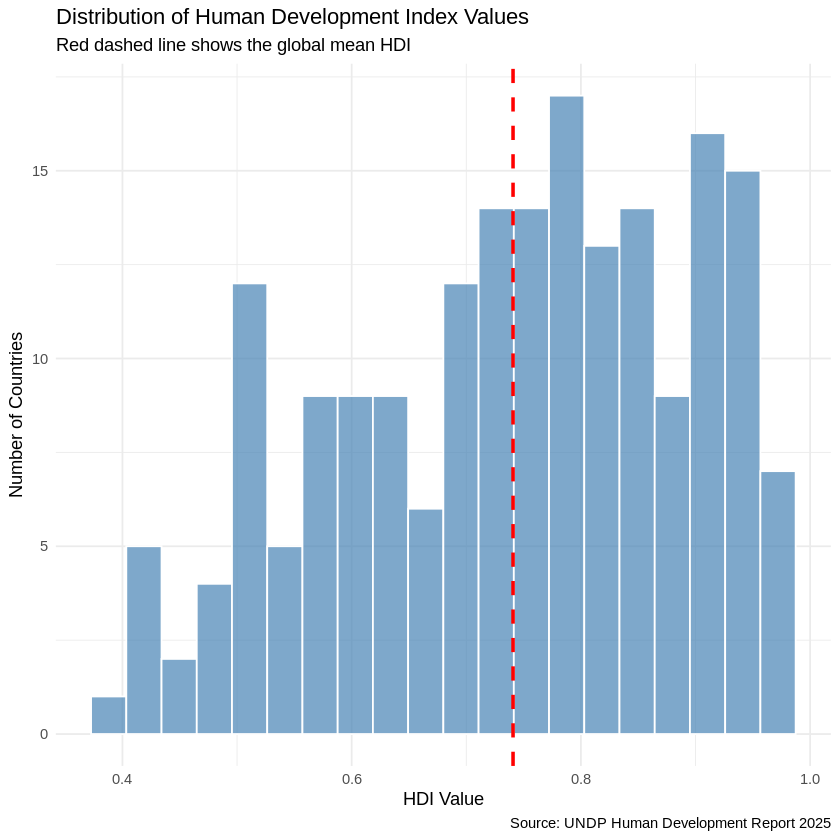

In [29]:
# Create histogram of HDI values showing distribution across countries
ggplot(hdi_final, aes(x = HDI_Value)) +
  geom_histogram(bins = 20, fill = "steelblue", color = "white", alpha = 0.7) +
  geom_vline(xintercept = mean(hdi_final$HDI_Value, na.rm = TRUE),
             color = "red", linetype = "dashed", linewidth = 1) +
  labs(title = "Distribution of Human Development Index Values",
       subtitle = "Red dashed line shows the global mean HDI",
       x = "HDI Value",
       y = "Number of Countries",
       caption = "Source: UNDP Human Development Report 2025") +
  theme_minimal()

## Step 9: Visualization 2 - Life Expectancy vs GNI per Capita

This scatter plot shows the relationship between Life Expectancy and GNI per Capita. These are two of the three dimensions used to calculate HDI. The plot reveals that higher income countries generally have higher life expectancy, though the relationship shows diminishing returns at higher income levels.

`geom_smooth()` using formula = 'y ~ x'


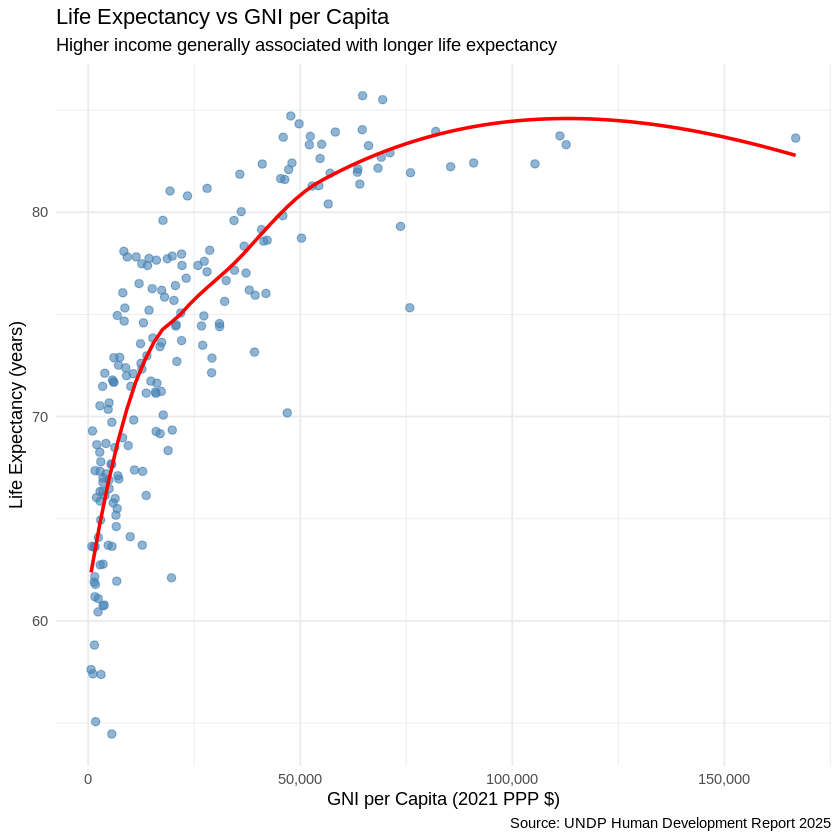

In [30]:
# Create scatter plot showing relationship between life expectancy and income
ggplot(hdi_final, aes(x = GNI_Per_Capita, y = Life_Expectancy)) +
  geom_point(alpha = 0.6, color = "steelblue", size = 2) +
  geom_smooth(method = "loess", color = "red", se = FALSE) +
  scale_x_continuous(labels = scales::comma) +
  labs(title = "Life Expectancy vs GNI per Capita",
       subtitle = "Higher income generally associated with longer life expectancy",
       x = "GNI per Capita (2021 PPP $)",
       y = "Life Expectancy (years)",
       caption = "Source: UNDP Human Development Report 2025") +
  theme_minimal()

## Step 10: Visualization 3 - Education Indicators Comparison

This scatter plot compares Expected Years of Schooling with Mean Years of Schooling. Expected years represents future educational attainment for children entering school, while mean years shows current adult education levels. Points above the diagonal line indicate countries where future generations are expected to receive more education than current adults.

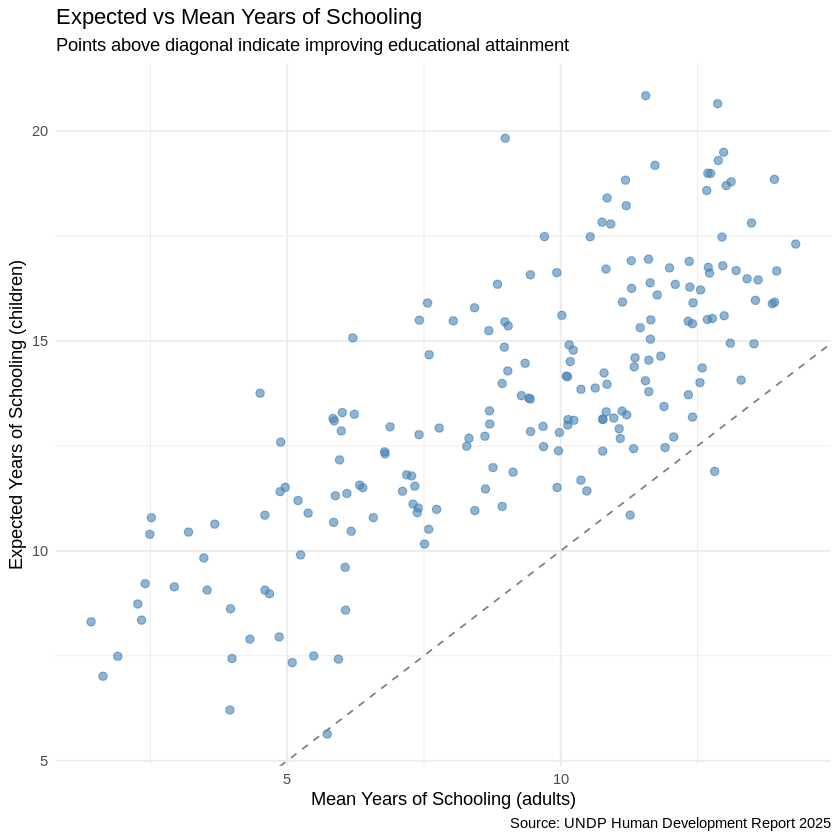

In [31]:
# Create scatter plot comparing education indicators
ggplot(hdi_final, aes(x = Mean_Years_Schooling, y = Expected_Years_Schooling)) +
  geom_point(alpha = 0.6, color = "steelblue", size = 2) +
  geom_abline(slope = 1, intercept = 0, linetype = "dashed", color = "gray50") +
  labs(title = "Expected vs Mean Years of Schooling",
       subtitle = "Points above diagonal indicate improving educational attainment",
       x = "Mean Years of Schooling (adults)",
       y = "Expected Years of Schooling (children)",
       caption = "Source: UNDP Human Development Report 2025") +
  theme_minimal()